TruncatedSVD와 PCA는 밀집 행렬에 대해서는 매우 유사한 결과를 생성합니다. 특히 데이터가 스케일링되고 중심에 맞춰졌을 때 결과가 유사할 수 있습니다.
다만, 희소 행렬에 대해서는 TruncatedSVD가 더 잘 작동하며, PCA와는 결과가 다를 수 있습니다.

TruncatedSVD와 PCA의 차이

PCA (Principal Component Analysis):
- PCA는 입력 데이터의 공분산 행렬을 사용하여 주성분을 찾습니다.
- 데이터가 중심에 맞춰져 있어야 하므로, 일반적으로 스케일링 후 평균을 0으로 맞추는 것이 필요합니다.
- PCA는 밀집 행렬에 잘 맞습니다.

TruncatedSVD (Truncated Singular Value Decomposition):
- TruncatedSVD는 희소 행렬 또는 밀집 행렬에 대해 SVD를 수행하여 일부 성분만 계산합니다.
- 데이터의 중심 맞춤이 필요하지 않지만, 필요시 StandardScaler와 함께 사용할 수 있습니다.
- PCA와 다르게, 희소 행렬에서도 효과적으로 작동합니다.

Task1_0731. iris 데이터셋에 대하여 n_components=2를 적용하고 TruncatedSVD를 사용하여 추출된 2개의 component로 품종을 구분하는 것을 시각화하세요.

- from sklearn.decomposition import TruncatedSVD

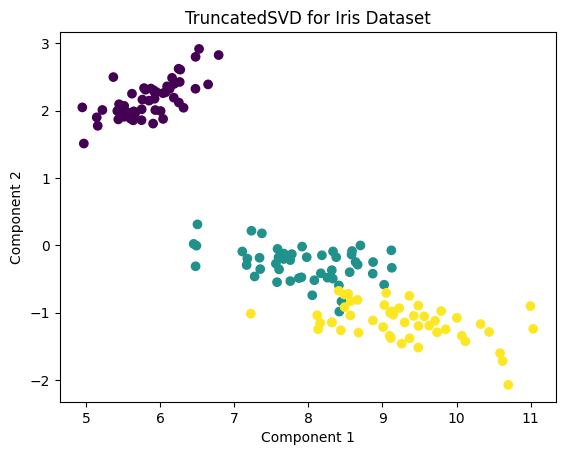

In [2]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('TruncatedSVD for Iris Dataset')
plt.show()

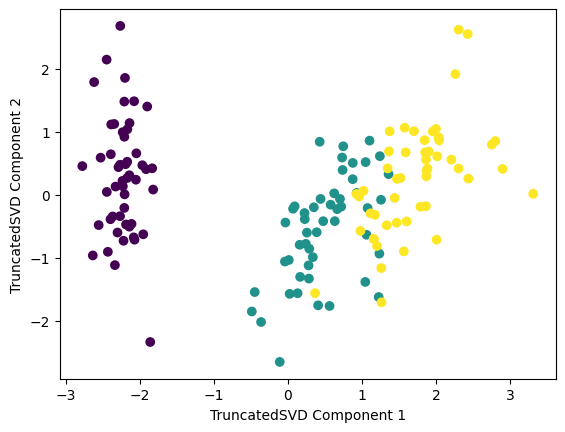

In [1]:
# 정답
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


iris = load_iris()
iris_ftrs = iris.data

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()
plt.close()

Task2_0731. Task1_0731 사례를 PCA로 적용한 시각화 결과와 비교하세요.

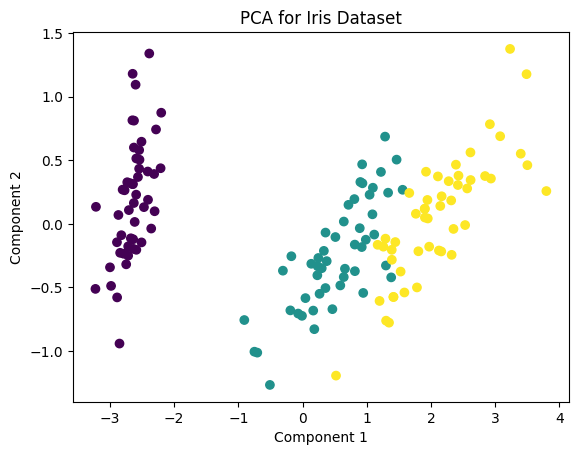

In [ ]:
from sklearn.decomposition import PCA

X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA for Iris Dataset')
plt.show()

Task3_0731. 와인 품질 데이터셋을 사용하여 Truncated SVD를 통해 차원 축소를 수행하고, 로지스틱 회귀 모델을 학습 및 평가를 수행하세요.(다음 사항 참조)

- 특성 및 레이블 분리: 데이터셋에서 와인의 화학적 특성(X)과 품질 레이블(y)을 분리합니다.
- 레이블 변환: 와인 품질을 범주형 변수로 변환합니다. 구체적으로, 품질 점수가 3-5인 경우 'low', 6인 경우 'medium', 7-8인 경우 'high'로 변환합니다.
- 데이터 정규화: StandardScaler를 사용하여 데이터의 특성을 정규화합니다.
- 차원 축소: TruncatedSVD를 사용하여 데이터의 차원을 5로 축소합니다.
- 데이터 분할: 데이터를 학습용과 테스트용으로 분할합니다.
- 모델 학습: 로지스틱 회귀 모델을 학습합니다.
- 모델 예측 및 평가: 테스트 데이터에 대한 예측을 수행하고, 정확도와 분류 보고서를 출력

In [3]:
import pandas as pd

# 1. 데이터 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# @title 기본 제목 텍스트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize

# 1. 데이터 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# 특성과 레이블 분리
X = data.drop(columns='quality')
y = data['quality']

# 품질을 범주형 변수로 변환 (예: 3-5 -> low, 6 -> medium, 7-8 -> high)
y = y.apply(lambda x: 'low' if x <= 5 else ('medium' if x == 6 else 'high'))

# 2. 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. TruncatedSVD를 사용하여 차원 축소
n_components = 5  # 축소할 차원의 수
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X_scaled)

# 4. 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=42)

# 5. 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 평가 사용자 함수 정의
def evaluate_model(model, X_test, y_test):
    # 예측 수행
    y_pred = model.predict(X_test)

    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)

    # 분류 보고서 생성
    report = classification_report(y_test, y_pred)

    # ROC AUC 계산
    y_test_binarized = label_binarize(y_test, classes=['low', 'medium', 'high'])
    y_pred_prob = model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')

    # 결과 출력
    print(f"Test Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    print(f"Test ROC AUC: {roc_auc:.4f}")

# 6. 모델 평가
evaluate_model(model, X_test, y_test)


Test Accuracy: 0.5719

Classification Report:
              precision    recall  f1-score   support

        high       0.44      0.26      0.32        47
         low       0.64      0.80      0.71       141
      medium       0.50      0.44      0.47       132

    accuracy                           0.57       320
   macro avg       0.53      0.50      0.50       320
weighted avg       0.55      0.57      0.55       320

Test ROC AUC: 0.4285
